### Cat vs Dog NN Model

In [1]:
### Installing the Kaggle Library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Configuring the path of kaggle library
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:29<00:00, 22.8MB/s]
100% 812M/812M [00:29<00:00, 29.1MB/s]


In [4]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = "dogs-vs-cats.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted successfully')
    

The dataset is extracted successfully


In [5]:
from zipfile import ZipFile
dataset = "train.zip"

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted successfully')
    

The dataset is extracted successfully


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Total no. of images: ', file_count)


Total no. of images:  25000


### Printing the file names

In [7]:
file_names = os.listdir('train')
print(file_names)

['cat.5494.jpg', 'cat.3470.jpg', 'cat.8153.jpg', 'cat.1870.jpg', 'cat.2118.jpg', 'cat.4713.jpg', 'cat.1302.jpg', 'cat.4591.jpg', 'cat.9523.jpg', 'dog.7481.jpg', 'cat.1944.jpg', 'cat.2986.jpg', 'dog.5178.jpg', 'cat.2679.jpg', 'cat.12387.jpg', 'cat.1717.jpg', 'cat.10859.jpg', 'cat.11499.jpg', 'cat.5884.jpg', 'dog.6704.jpg', 'dog.1501.jpg', 'cat.5502.jpg', 'dog.11634.jpg', 'cat.7811.jpg', 'cat.2059.jpg', 'dog.4756.jpg', 'dog.6021.jpg', 'cat.11268.jpg', 'cat.1205.jpg', 'dog.4151.jpg', 'dog.11311.jpg', 'cat.686.jpg', 'dog.6891.jpg', 'dog.5945.jpg', 'dog.11962.jpg', 'dog.10316.jpg', 'cat.8530.jpg', 'dog.3864.jpg', 'cat.2532.jpg', 'dog.7895.jpg', 'cat.10419.jpg', 'cat.5298.jpg', 'dog.7211.jpg', 'cat.9129.jpg', 'cat.10733.jpg', 'cat.2867.jpg', 'cat.2143.jpg', 'dog.10994.jpg', 'cat.7018.jpg', 'cat.8285.jpg', 'dog.7224.jpg', 'cat.8955.jpg', 'dog.5118.jpg', 'dog.12341.jpg', 'dog.884.jpg', 'cat.2341.jpg', 'cat.9492.jpg', 'dog.10903.jpg', 'cat.11987.jpg', 'cat.11727.jpg', 'cat.12313.jpg', 'dog.6776

### Importing the Dependencies

In [8]:
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


In [10]:
import cv2
import os

In [11]:
import matplotlib.pyplot as plt

### Displaying Images

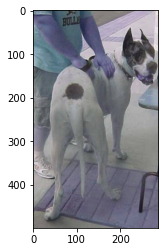

In [12]:
# Displaying Dog Image
img = cv2.imread('train/dog.5092.jpg')
plt.imshow(img)

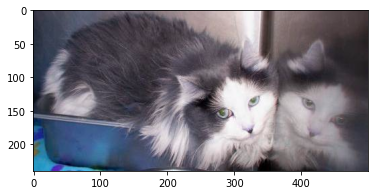

In [13]:
# Displaying Cat Image
img = cv2.imread('train/cat.2959.jpg')
plt.imshow(img)

#Takeaway - images are all diff sizes and we need to resize for NN


In [14]:
# Python script for counting no. of cats and dogs
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    name = img_file[0:3]
    
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
        
print('Number of dog images = ',dog_count)
print('Number of cat images = ',cat_count)        

Number of dog images =  12500
Number of cat images =  12500


In [ ]:
# ### Shuffling the images inside the folder
# import random, os
# l = os.listdir("train")
# random.shuffle(l)
# print("images: ", l)

images:  ['dog.8512.jpg', 'cat.9841.jpg', 'cat.10621.jpg', 'cat.12365.jpg', 'cat.3811.jpg', 'cat.6796.jpg', 'dog.10165.jpg', 'dog.7166.jpg', 'cat.9901.jpg', 'dog.10783.jpg', 'cat.10334.jpg', 'dog.6214.jpg', 'cat.10821.jpg', 'cat.9238.jpg', 'cat.8022.jpg', 'dog.8626.jpg', 'dog.1935.jpg', 'dog.3803.jpg', 'dog.1078.jpg', 'dog.11387.jpg', 'cat.1735.jpg', 'dog.12224.jpg', 'dog.5927.jpg', 'dog.8232.jpg', 'cat.7113.jpg', 'dog.6803.jpg', 'cat.2621.jpg', 'dog.1359.jpg', 'cat.3284.jpg', 'dog.1066.jpg', 'dog.10543.jpg', 'cat.12209.jpg', 'cat.9205.jpg', 'cat.3976.jpg', 'cat.1363.jpg', 'cat.4242.jpg', 'cat.4513.jpg', 'cat.4379.jpg', 'cat.11570.jpg', 'dog.10744.jpg', 'cat.8646.jpg', 'dog.4462.jpg', 'dog.5587.jpg', 'dog.12080.jpg', 'dog.3492.jpg', 'dog.9492.jpg', 'dog.765.jpg', 'cat.314.jpg', 'cat.185.jpg', 'dog.3250.jpg', 'dog.6525.jpg', 'dog.8737.jpg', 'cat.9977.jpg', 'dog.7120.jpg', 'dog.10081.jpg', 'dog.10475.jpg', 'cat.10228.jpg', 'dog.6718.jpg', 'cat.1198.jpg', 'dog.2412.jpg', 'dog.9024.jpg', '

In [15]:
### creating a directory for resized images
os.mkdir('shuffled_data')
os.mkdir('image_resized')

In [16]:
import random

In [17]:
### Shuffling the data 
file_names = os.listdir('train')
lst = random.sample(file_names, 2000)
original_folder = 'train/'
shuffled_folder = 'shuffled_data/'
for i in lst:
    file_name = i
    img_path = original_folder+file_name
    img = Image.open(img_path)
    newImgPath = shuffled_folder+file_name
    img.save(newImgPath)
    


In [19]:
### Resizing the images
original_folder = 'shuffled_data/'
resized_folder = 'image_resized/'

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

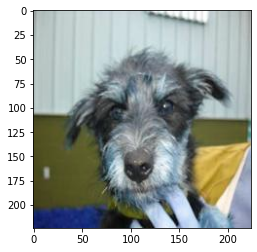

In [20]:
# Displaying Dog Image
img = cv2.imread('/content/image_resized/dog.10234.jpg')
plt.imshow(img)

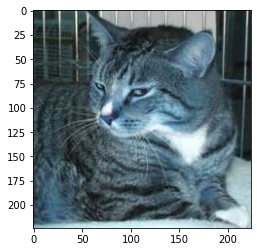

In [21]:
# Displaying Cat Image
img = cv2.imread('/content/image_resized/cat.213.jpg')
plt.imshow(img)


# Creating labels for cats and dogs

In [22]:
filenames = os.listdir('image_resized')
labels = []
dog, cat = 0, 0
for file_name in filenames:
    if file_name[0:3] == 'dog':
        labels.append(1)
        dog += 1
    else:
        labels.append(0)
        cat += 1


In [23]:
print(filenames[0:5])
print(len(filenames))
print("dog: ", dog,"\ncat: ", cat)

['cat.2118.jpg', 'cat.9523.jpg', 'cat.5884.jpg', 'dog.4756.jpg', 'cat.11268.jpg']
2000
dog:  1036 
cat:  964


In [24]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 1, 0]
2000


In [25]:
import cv2
import glob

In [26]:
image_directory = 'image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[ 95 143 185]
   [ 94 142 184]
   [ 93 141 183]
   ...
   [186 221 255]
   [189 220 251]
   [193 223 252]]

  [[ 95 143 185]
   [ 95 143 185]
   [ 94 142 184]
   ...
   [184 219 253]
   [187 218 249]
   [192 222 251]]

  [[ 95 143 185]
   [ 95 143 185]
   [ 96 144 186]
   ...
   [181 216 250]
   [185 216 247]
   [190 220 249]]

  ...

  [[ 85 111 117]
   [ 85 111 117]
   [ 85 111 117]
   ...
   [104 129 155]
   [105 130 156]
   [106 131 157]]

  [[ 86 113 117]
   [ 85 112 116]
   [ 84 110 116]
   ...
   [109 134 160]
   [109 134 160]
   [109 134 160]]

  [[ 87 114 118]
   [ 85 112 116]
   [ 84 110 116]
   ...
   [111 136 162]
   [110 135 161]
   [109 134 160]]]


 [[[ 33  30  39]
   [ 24  21  30]
   [ 24  21  30]
   ...
   [ 62  54  47]
   [ 59  51  44]
   [ 13   5   0]]

  [[ 41  38  47]
   [ 25  22  31]
   [ 21  18  27]
   ...
   [113 107 100]
   [107  99  92]
   [ 55  49  42]]

  [[ 68  65  74]
   [ 35  32  41]
   [ 17  14  23]
   ...
   [122 119 111]
   [111 105  98]
   [ 54  51

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape) #3 reprents RGB images, 224x224 is size of image

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

# Train Test Split 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


#training_data ---> 1600
#testing_data ---> 400

In [33]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.38039216 0.43921569 0.50196078]
   [0.37647059 0.43529412 0.49803922]
   [0.38039216 0.43921569 0.50196078]
   ...
   [0.34117647 0.48627451 0.57254902]
   [0.34117647 0.48627451 0.57254902]
   [0.34509804 0.49019608 0.57647059]]

  [[0.39607843 0.45490196 0.51764706]
   [0.39215686 0.45098039 0.51372549]
   [0.39215686 0.45098039 0.51372549]
   ...
   [0.34901961 0.49411765 0.58039216]
   [0.34509804 0.49019608 0.57647059]
   [0.34117647 0.48627451 0.57254902]]

  [[0.4        0.45882353 0.52156863]
   [0.39607843 0.45490196 0.51764706]
   [0.4        0.45882353 0.52156863]
   ...
   [0.34901961 0.49411765 0.58039216]
   [0.34509804 0.47843137 0.56862745]
   [0.3372549  0.47058824 0.56078431]]

  ...

  [[0.81568627 0.82745098 0.84313725]
   [0.81568627 0.83529412 0.84705882]
   [0.83137255 0.84313725 0.85882353]
   ...
   [0.98039216 0.98039216 0.98039216]
   [0.98431373 0.98431373 0.98431373]
   [0.99215686 0.99215686 0.99215686]]

  [[0.8745098  0.88235294 0.88627451]
   [0.8

# Building the Neural Network

In [35]:
!pip install tensorflow --user
!pip install tensorflow_hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224, 224, 3), trainable = False)

In [40]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [42]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [43]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.2184 - acc: 0.9069
Epoch 2/5
50/50 [==============================] - 68s 1s/step - loss: 0.0737 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 63s 1s/step - loss: 0.0543 - acc: 0.9831
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0423 - acc: 0.9875
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0347 - acc: 0.9894


In [44]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.1042 - acc: 0.9625
Test Loss = 0.10419770330190659
Test Accuracy = 0.9624999761581421


# Predictive System

In [50]:
import cv2

Path of the image to be tested: /content/dog.jfif


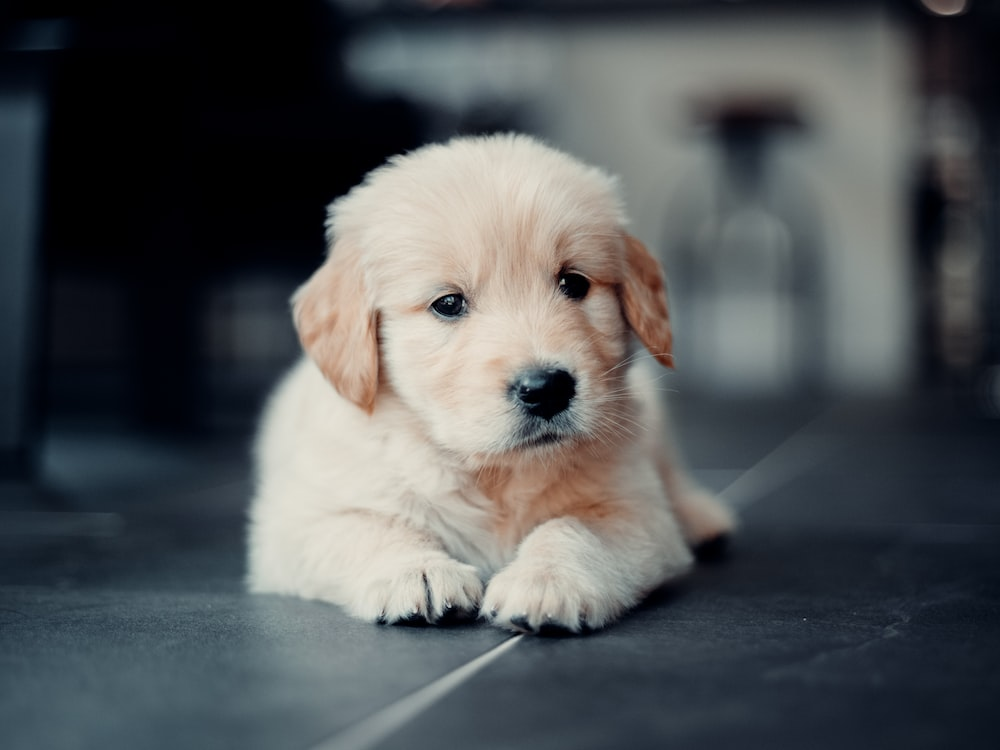

1/1 [==============================] - 0s 123ms/step
[[-3.007009   3.6355531]]
1
The image represents a Dog


In [55]:
input_image_path = input("Path of the image to be tested: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
    print('The image represents a Cat')
    
else:
    print('The image represents a Dog')

Path of the image to be tested: /content/cat.jpg


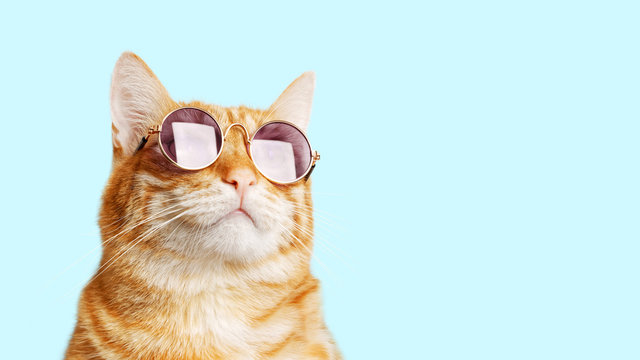

1/1 [==============================] - 0s 74ms/step
[[ 5.2383256 -5.007484 ]]
0
The image represents a Cat


In [57]:
input_image_path = input("Path of the image to be tested: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
    print('The image represents a Cat')
    
else:
    print('The image represents a Dog')